In [21]:
from sklearn.datasets import make_friedman1
from src import *
import numpy as np
import timeit
import xgboost as xgb

sizes = [1000, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000, 250000, 500000, 750000, 1000000]
times = np.zeros((len(sizes), 5))
n_features = 5

linspace = DataBinner(method = 'linspace', n_bins = 255)
quantile = DataBinner(method = 'quantile', n_bins = 255)
kmeans = DataBinner(method = 'kmeans', n_bins = 255)
minibatch_kmeans = DataBinner(method = 'minibatch_kmeans', n_bins = 255)

print(xgb.XGBClassifier.__name__)

for i, size in enumerate(sizes):
    print(f"Size: {size}")
    X, y = make_friedman1(n_samples=size, n_features=n_features, noise=0.0, random_state=0)
    times[i, 0] = timeit.timeit(lambda: linspace.fit_transform(X), number=1)
    times[i, 1] = timeit.timeit(lambda: quantile.fit_transform(X), number=1)
    times[i, 2] = timeit.timeit(lambda: kmeans.fit_transform(X), number=1)
    times[i, 3] = timeit.timeit(lambda: minibatch_kmeans.fit_transform(X), number=1)
    times[i, 4] = timeit.timeit(lambda: xgb.XGBRegressor().fit(X, y), number=1)


XGBClassifier
Size: 1000
Size: 2500
Size: 5000
Size: 7500
Size: 10000
Size: 25000
Size: 50000
Size: 75000
Size: 100000
Size: 250000
Size: 500000
Size: 750000
Size: 1000000


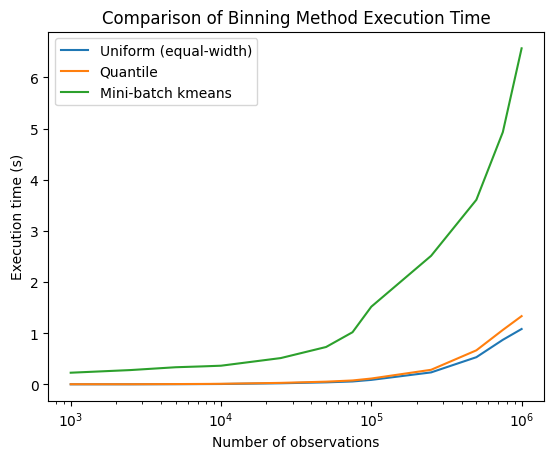

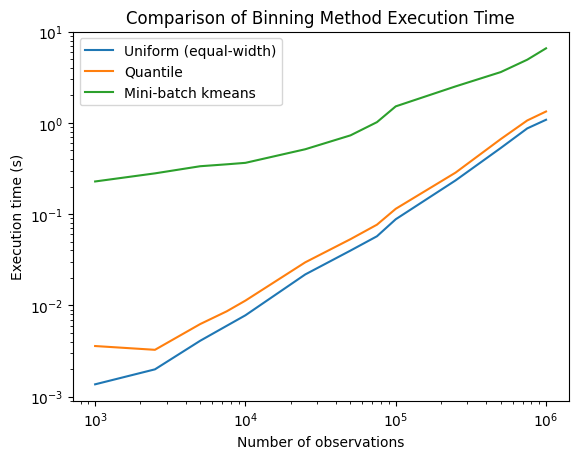

In [29]:
import matplotlib.pyplot as plt

plt.plot(sizes, times[:, 0], label='Uniform (equal-width)')
plt.plot(sizes, times[:, 1], label='Quantile')
#plt.plot(sizes, times[:, 2], label='kmeans')
plt.plot(sizes, times[:, 3], label='Mini-batch kmeans')
plt.legend()
#plt.yscale('log')
plt.xscale('log')
plt.title("Comparison of Binning Method Execution Time")
plt.xlabel("Number of observations")
plt.ylabel("Execution time (s)")
plt.savefig('timing_linear.png')
plt.show()

plt.plot(sizes, times[:, 0], label='Uniform (equal-width)')
plt.plot(sizes, times[:, 1], label='Quantile')
#plt.plot(sizes, times[:, 2], label='kmeans')
plt.plot(sizes, times[:, 3], label='Mini-batch kmeans')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title("Comparison of Binning Method Execution Time")
plt.title("Comparison of Binning Method Execution Time")
plt.xlabel("Number of observations")
plt.ylabel("Execution time (s)")
plt.savefig('timing_log.png')